In [8]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Importaciones de Librearias

In [2]:
import pandas as pd
import numpy as np

#Algoritmo KMeans
from sklearn.cluster import KMeans
#Método de Sillhouette
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [3]:
dataset=pd.read_csv('crime_data.csv')
dataset.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### Eliminación de la Variable State, ya que no se va a utilizar para la segmentación

In [4]:
columnas=list(dataset.columns)
columnas.remove('State')

crime_data=dataset[columnas]

#### Para seleccionar el número de clústeres se utilizará el método de la Sillhouette

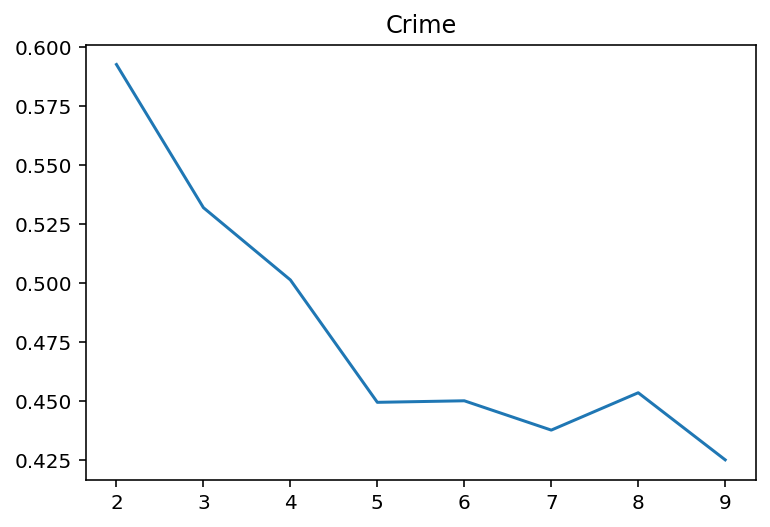

In [5]:
def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(crime_data, 'Crime')

#### Como se puede compromar el número óptimo de clústeres es 2

In [6]:
kmeans=KMeans(n_clusters=2, n_init=10).fit(crime_data)
kmeans.cluster_centers_

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

In [7]:
clust=kmeans.predict(crime_data)

for i in range(max(clust)+1):
    print('Cluster', i)
    print(dataset['State'][clust==i])

Cluster 0
6       Connecticut
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
20    Massachusetts
22        Minnesota
24         Missouri
25          Montana
26         Nebraska
28    New Hampshire
29       New Jersey
33     North Dakota
34             Ohio
35         Oklahoma
36           Oregon
37     Pennsylvania
38     Rhode Island
40     South Dakota
43             Utah
44          Vermont
45         Virginia
46       Washington
47    West Virginia
48        Wisconsin
49          Wyoming
Name: State, dtype: object
Cluster 1
0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
7           Delaware
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Caro